In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# set path to Figures
figures = os.path.join(os.getcwd(), 'Figures')
print("Figures will be saved in: ", figures)
if not os.path.exists(figures):
    os.makedirs(figures)

# set style for seaborn and size of figures
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [9, 6]

Figures will be saved in:  c:\Users\User\OneDrive\Documentos\Teaching\PolEcon-Oxford2025\03 Simulations\Week1\Figures


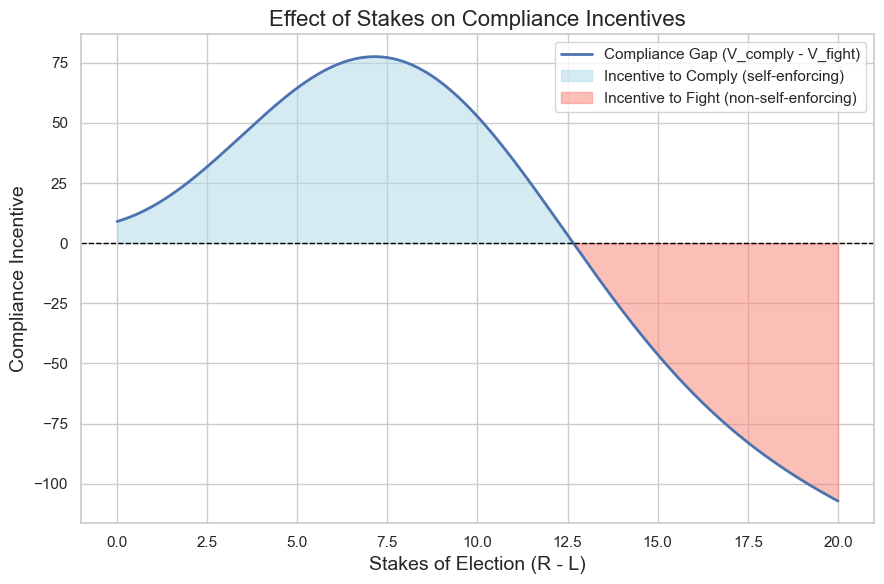

In [11]:
# Parameters
delta = 0.95   # Discount factor
p = 0.3        # Probability of violent success
c = 2          # Cost of fighting
k = 1          # Cost of political engagement
L = 2          # Payoff from being ruled

# Stakes must be positive
stakes = np.linspace(0.01, 20, 500)  # Stakes (R - L), starting just above 0

# Probability of winning elections as a function of stakes (hump-shaped)
a = 0.9     # Peak election probability
b = 0.02    # Width parameter
mu = 5      # Stakes level where winning chance is highest

pi = a * np.exp(-b * (stakes - mu)**2)

# Expected lifetime payoff from complying
V_comply = delta * (pi * stakes + L - k) / (1 - delta)

# Assume R = stakes + L
R = stakes + L
V_fight = p * R / (1 - delta) - c

# Compliance incentive
compliance_gap = V_comply - V_fight

# Compute stakes at which compliance gap is zero
zero_stakes = stakes[np.where(np.isclose(compliance_gap, 0, atol=1e-5))]

# Plotting
fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(stakes, compliance_gap, label='Compliance Gap (V_comply - V_fight)', linewidth=2)
ax.axhline(0, color='black', linestyle='--', linewidth=1)
# shade the area where compliance gap is positive
ax.fill_between(stakes, compliance_gap, where=(compliance_gap > 0), color='lightblue', alpha=0.5, label='Incentive to Comply (self-enforcing)')
ax.fill_between(stakes, compliance_gap, where=(compliance_gap < 0), color='salmon', alpha=0.5, label='Incentive to Fight (non-self-enforcing)')
if zero_stakes.size > 0:
	ax.axvline(zero_stakes, color='red', linestyle='--', label='Zero Compliance Gap', linewidth=1)

ax.set_xlabel('Stakes of Election (R - L)', fontsize=14)
ax.set_ylabel('Compliance Incentive', fontsize=14)
ax.set_title('Effect of Stakes on Compliance Incentives', fontsize=16)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(figures, 'compliance_incentives.png'), dpi=300)
plt.show()